# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score #plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Loading Dataset

In [2]:
sheet_name = 'Complete_case'
df = pd.read_excel('01_datasets.xlsx',sheet_name=sheet_name)
df.head()

,age,blood pressure,specific gravity,albumin,Sugar,Pus Cell,Pus Cell clumps,Bacteria,Blood Glucose Random,Blood Urea,Serum Creatinine,Hemoglobin,Packed Cell Volume,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,80,1.020,1,0,normal,notpresent,notpresent,121,36.0,1.2,15.4,44,yes,yes,no,good,no,no,ckd
1,62,80,1.010,2,3,normal,notpresent,notpresent,423,53.0,1.8,9.6,31,no,yes,no,poor,no,yes,ckd
2,48,70,1.005,4,0,abnormal,present,notpresent,117,56.0,3.8,11.2,32,yes,no,no,poor,yes,yes,ckd
3,51,80,1.010,2,0,normal,notpresent,notpresent,106,26.0,1.4,11.6,35,no,no,no,good,no,no,ckd
4,68,70,1.010,0,0,normal,notpresent,notpresent,100,54.0,24.0,12.4,36,no,no,no,good,no,no,ckd


# Exploratory Data Analysis

### Looking at the class distribution

<Axes: xlabel='Class ', ylabel='count'>

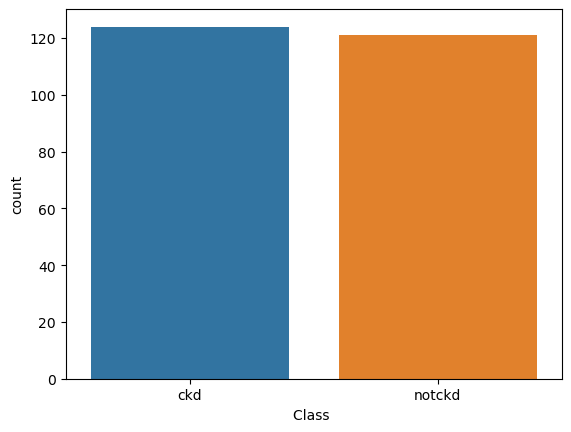

In [3]:
sns.countplot(data = df, x = 'Class ')

### Count plot of Appetite with hue as Class

<Axes: xlabel='Appetite', ylabel='count'>

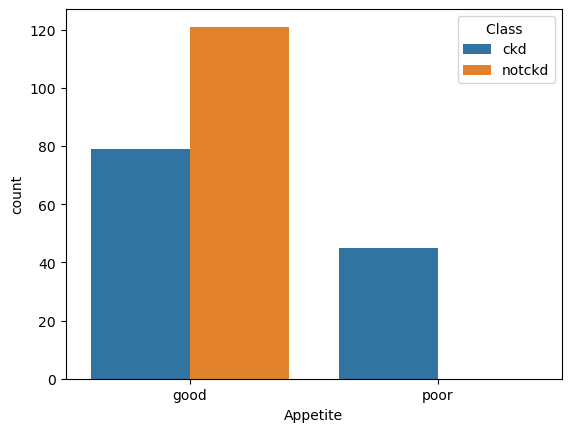

In [4]:
sns.countplot(data = df, x = 'Appetite', hue = 'Class ')

### Count plot of Diabetes Mellitus with hue as Class

<Axes: xlabel='Diabetes Mellitus', ylabel='count'>

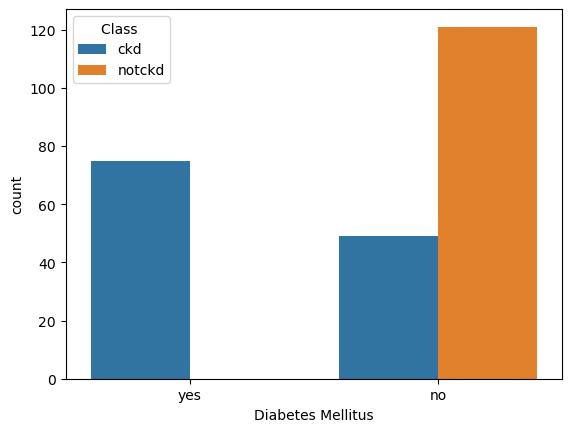

In [5]:
sns.countplot(data = df, x = 'Diabetes Mellitus', hue = 'Class ')

### Count plot of Specific Gravity with hue as Class

<Axes: xlabel='specific gravity', ylabel='count'>

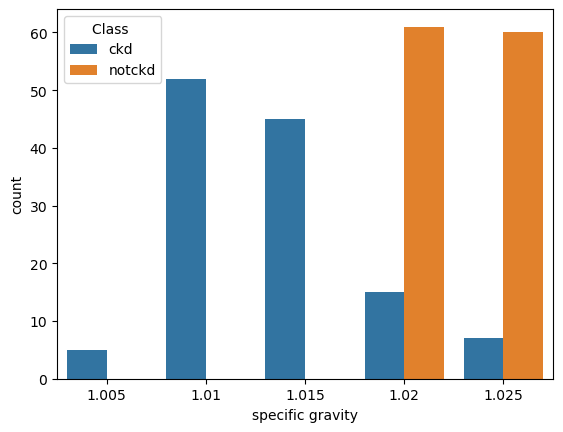

In [6]:
sns.countplot(data = df, x = 'specific gravity', hue = 'Class ')

### Checking data type of each Feature

In [7]:
feature_type = {}
for columns in df.columns:
    print(columns, ':', df[columns].dtype)
    feature_type[columns] = str(df[columns].dtype)

age : int64
blood pressure : int64
specific gravity : float64
albumin : int64
Sugar : int64
Pus Cell : object
Pus Cell clumps : object
Bacteria : object
Blood Glucose Random : int64
Blood Urea : float64
Serum Creatinine : float64
Hemoglobin : float64
Packed  Cell Volume : int64
Hypertension : object
Diabetes Mellitus : object
Coronary Artery Disease : object
Appetite : object
Pedal Edema : object
Anemia : object
Class  : object


# Pre Processing

### Converting categorical features to dummy variables

In [8]:
other_cat_features = ['specific gravity', 'albumin', 'Sugar', 'Red Blood Cells(nominal)']

In [9]:
#Dropping original categorical columns
for feature in feature_type:
    if (feature_type[feature] == 'object' and feature != 'Class ') or (feature in other_cat_features):
        dummies = pd.get_dummies(df[feature])
        for columns in dummies.columns:
            df[f'{feature}_{columns}'] = dummies[columns]
        
        df.drop(columns=[feature], inplace=True)

### Mapping class to Binary(1 and 0) 

In [10]:
df['Class '].value_counts()

ckd       124
notckd    121
Name: Class , dtype: int64

In [11]:
df['Class '] = df['Class '].map(lambda x: 1 if x == 'ckd' else 0)
df['Class '].value_counts()

1    124
0    121
Name: Class , dtype: int64

### Scatter Plot of Packed Cell Volume with Hue as Class

<Axes: xlabel='Packed  Cell Volume', ylabel='Class '>

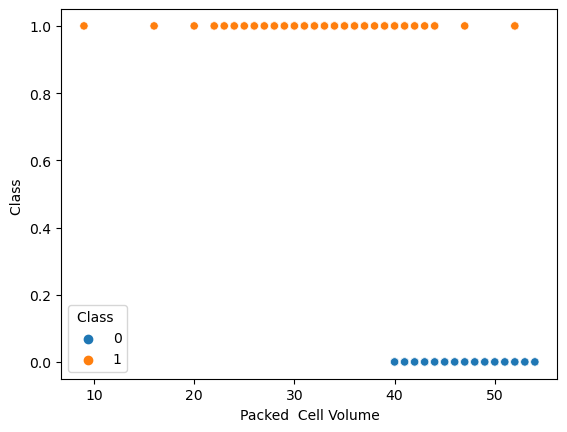

In [12]:
sns.scatterplot(data = df, x = 'Packed  Cell Volume', y = 'Class ', hue = 'Class ')

### Scatter Plot of Hemoglobin with Hue as Class 

<Axes: xlabel='Hemoglobin', ylabel='Class '>

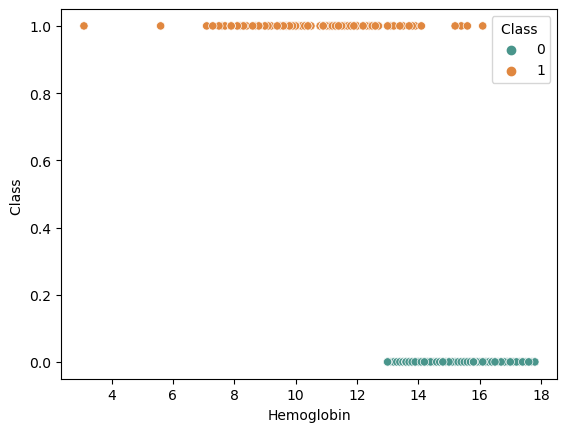

In [13]:
sns.scatterplot(data = df, x = 'Hemoglobin', y = 'Class ', hue = 'Class ', palette = ['#49958B', '#E0873F'])

# Scaling Continuous Data

In [14]:
feature_scalar = {}
for feature in feature_type:
    if feature_type[feature] in ['int64', 'float64'] and feature not in other_cat_features:
        scalar = StandardScaler().fit(df[feature].values.reshape(-1,1))
        df.loc[:,feature] = scalar.transform(df[feature].values.reshape(-1,1))

        feature_scalar[feature] = scalar
feature_scalar

{'age': StandardScaler(),
 'blood pressure': StandardScaler(),
 'Blood Glucose Random': StandardScaler(),
 'Blood Urea': StandardScaler(),
 'Serum Creatinine': StandardScaler(),
 'Hemoglobin': StandardScaler(),
 'Packed  Cell Volume': StandardScaler()}

In [15]:
df

,age,blood pressure,Blood Glucose Random,Blood Urea,Serum Creatinine,Hemoglobin,Packed Cell Volume,Class,specific gravity_1.005,specific gravity_1.01,...,Diabetes Mellitus_no,Diabetes Mellitus_yes,Coronary Artery Disease_no,Coronary Artery Disease_yes,Appetite_good,Appetite_poor,Pedal Edema_no,Pedal Edema_yes,Anemia_no,Anemia_yes
0,-0.237616,0.381919,-0.303475,-0.401425,-0.383738,0.887954,0.503524,1,0,0,...,0,1,1,0,1,0,1,0,1,0
1,0.641589,0.381919,3.513299,-0.014448,-0.200054,-1.196949,-0.988313,1,0,1,...,0,1,1,0,0,1,1,0,0,1
2,-0.237616,-0.484471,-0.354028,0.053842,0.412228,-0.621803,-0.873556,1,1,0,...,1,0,1,0,0,1,0,1,0,1
3,-0.049215,0.381919,-0.493049,-0.629059,-0.322510,-0.478016,-0.529286,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,1.018391,-0.484471,-0.568879,0.008316,6.596271,-0.190444,-0.414529,1,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,0.201986,0.381919,-0.063346,-0.105501,-0.598037,0.995794,0.847794,0,0,0,...,1,0,1,0,1,0,1,0,1,0
241,-0.614418,-0.484471,-0.884837,-0.515242,-0.383738,1.283367,1.651091,0,0,0,...,1,0,1,0,1,0,1,0,1,0
242,-2.498428,0.381919,-0.568879,-0.629059,-0.567423,1.031741,1.077308,0,0,0,...,1,0,1,0,1,0,1,0,1,0
243,-2.184426,-1.350861,-0.391943,-0.082738,-0.444966,0.456595,1.306821,0,0,0,...,1,0,1,0,1,0,1,0,1,0


# Splitting the dataset into test train split

In [17]:
property_variable = 'Class '
X_all = df[[x for x in df.columns if x != property_variable]].values
Y_all = df[property_variable].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)

# Generating Models
## Logistic Regression
### Cross Validation to show Robustness

In [19]:
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=10, test_size=0.15)
scores = cross_val_score(LogisticRegression(max_iter=500, fit_intercept=False, C=1e9), X_train, Y_train.reshape(-1), cv = cv)

In [20]:
lr_df = pd.DataFrame({'iteration' : [f'iterration_{i}' for i in range(1, 11)], 'acurracy_score' : scores})
print(f"Mean: {lr_df['acurracy_score'].mean()}")
print(f"Std: {lr_df['acurracy_score'].std()}")

Mean: 0.9966666666666667
Std: 0.010540925533894595


### Final Logistic Regression Model

In [21]:
log_reg = LogisticRegression(max_iter=500, fit_intercept=False, C=1e9).fit(X_train, Y_train.reshape(-1))

In [22]:
y_pred = log_reg.predict(X_test)

Confusion Matrix : 
 [[24  0]
 [ 1 24]]


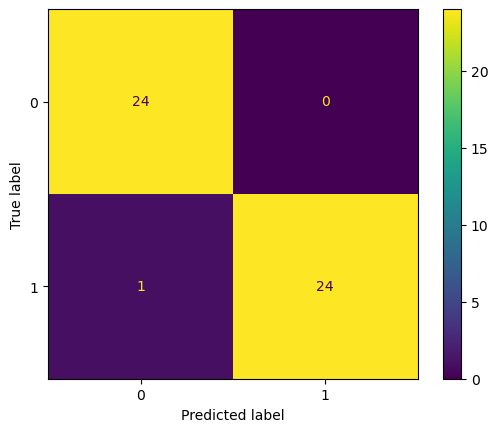

In [23]:
cm = confusion_matrix(Y_test, y_pred) 
print ("Confusion Matrix : \n", cm) 

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

## Support Vector Machine
### Cross Validation and Hypertuning to find most Optimal Parameters

In [24]:
param_grid = [
    {'C' : [0.5,1,10,100],
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
]

cv = ShuffleSplit(n_splits=20, test_size=0.15)

In [25]:
Y_train.reshape(-1).shape

(196,)

In [26]:
optimal_params = GridSearchCV(SVC(), param_grid, cv = cv, verbose =1)
optimal_params.fit(X_train,Y_train.reshape(-1))

Fitting 20 folds for each of 96 candidates, totalling 1920 fits


GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=None, test_size=0.15, train_size=None),
             estimator=SVC(),
             param_grid=[{'C': [0.5, 1, 10, 100],
                          'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             verbose=1)

In [27]:
parameters_HT_df = pd.DataFrame(optimal_params.cv_results_)[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by = 'rank_test_score')
parameters_HT_df

,params,mean_test_score,std_test_score,rank_test_score
58,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.991667,0.014434,1
1,"{'C': 0.5, 'gamma': 'scale', 'kernel': 'poly'}",0.991667,0.014434,1
25,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.991667,0.014434,1
74,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}",0.991667,0.014434,1
82,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.991667,0.014434,1
...,...,...,...,...
13,"{'C': 0.5, 'gamma': 0.01, 'kernel': 'poly'}",0.423333,0.049554,88
89,"{'C': 100, 'gamma': 0.001, 'kernel': 'poly'}",0.423333,0.049554,88
45,"{'C': 1, 'gamma': 0.0001, 'kernel': 'poly'}",0.423333,0.049554,88
65,"{'C': 10, 'gamma': 0.001, 'kernel': 'poly'}",0.423333,0.049554,88


In [28]:
best_params = optimal_params.best_params_
print(best_params)

{'C': 0.5, 'gamma': 'scale', 'kernel': 'poly'}
